In [1]:
# The dataset PBC2 is in the joineRML package
# install.packages('joineRML')
library(joineRML)

# install.packages('SmartEDA')
library(SmartEDA)

Le chargement a nécessité le package : nlme

Le chargement a nécessité le package : survival

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



https://www.rdocumentation.org/packages/joineRML/versions/0.4.6/topics/pbc2

| field | desc. |  
| --- | --- |
| id | patients identifier; in total there are 312 patients. |  
| years | number of years between registration and the earlier of death, transplantation, or study analysis time. |  
| status | a factor with levels alive, transplanted and dead. |
| drug | a factor with levels placebo and D-penicil. |
| age | at registration in years. |
| sex | a factor with levels male and female. |
| year | number of years between enrollment and this visit date, remaining values on the line of data refer to this visit. |
| ascites | a factor with levels No and Yes. |
| hepatomegaly | a factor with levels No and Yes. |
| spiders | a factor with levels No and Yes. |
| edema | a factor with levels No edema (i.e. no edema and no diuretic therapy for edema), edema no diuretics (i.e. edema present without diuretics, or edema resolved by diuretics), and edema despite diuretics (i.e. edema despite diuretic therapy). |
| serBilir | serum bilirubin in mg/dl. |
| serChol | serum cholesterol in mg/dl. |
| albumin | albumin in mg/dl. |
| alkaline | alkaline phosphatase in U/liter. |
| SGOT | SGOT in U/ml. |
| platelets | platelets per cubic ml/1000. |
| prothrombin | prothrombin time in seconds. |
| histologic | histologic stage of disease. |
| status2 | a numeric vector with the value 1 denoting if the patient was dead, and 0 if the patient was alive or transplanted. |

In [40]:
cols_to_drop <- c("histologic", "status2")

pbc2_data = pbc2[,!(names(pbc2) %in% cols_to_drop)]  # LOL

In [41]:
pbc2_data

id,years,status,drug,age,sex,year,ascites,hepatomegaly,spiders,edema,serBilir,serChol,albumin,alkaline,SGOT,platelets,prothrombin
<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,1.095170,dead,D-penicil,58.76684,female,0.0000000,Yes,Yes,Yes,edema despite diuretics,14.5,261,2.60,1718,138.0,190,12.2
1,1.095170,dead,D-penicil,58.76684,female,0.5256817,Yes,Yes,Yes,edema despite diuretics,21.3,NA,2.94,1612,6.2,183,11.2
2,14.152338,alive,D-penicil,56.44782,female,0.0000000,No,Yes,Yes,No edema,1.1,302,4.14,7395,113.5,221,10.6
2,14.152338,alive,D-penicil,56.44782,female,0.4983025,No,Yes,Yes,No edema,0.8,NA,3.60,2107,139.5,188,11.0
2,14.152338,alive,D-penicil,56.44782,female,0.9993429,No,Yes,Yes,No edema,1.0,NA,3.55,1711,144.2,161,11.6
2,14.152338,alive,D-penicil,56.44782,female,2.1027270,No,Yes,Yes,No edema,1.9,NA,3.92,1365,144.2,122,10.6
2,14.152338,alive,D-penicil,56.44782,female,4.9008871,Yes,Yes,Yes,edema no diuretics,2.6,230,3.32,1110,131.8,135,11.3
2,14.152338,alive,D-penicil,56.44782,female,5.8892783,Yes,Yes,Yes,edema despite diuretics,3.6,NA,2.92,996,131.8,100,11.5
2,14.152338,alive,D-penicil,56.44782,female,6.8858833,Yes,Yes,Yes,edema despite diuretics,4.2,NA,2.73,860,145.7,103,11.5


In [11]:
help(ExpData)

ExpData {SmartEDA},R Documentation
data,a data frame
type,Type 1 is overall data summary; Type 2 is variable level summary
fun,"to add any additional statistics into metadata type 2 output, for example: mean, sum, etc.."


In [42]:
ExpData(data=pbc2_data, type=1)

Descriptions,Value
<chr>,<chr>
Sample size (nrow),1945
No. of variables (ncol),18
No. of numeric/interger variables,10
No. of factor variables,8
No. of text variables,0
No. of logical variables,0
No. of identifier variables,0
No. of date variables,0
No. of zero variance variables (uniform),0


In [43]:
ExpData(data=pbc2_data, type=2)

Index,Variable_Name,Variable_Type,Sample_n,Missing_Count,Per_of_Missing,No_of_distinct_values
<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<int>
1,id,factor,1945,0,0.000,312
2,years,numeric,1945,0,0.000,305
3,status,factor,1945,0,0.000,3
4,drug,factor,1945,0,0.000,2
5,age,numeric,1945,0,0.000,308
6,sex,factor,1945,0,0.000,2
7,year,numeric,1945,0,0.000,1024
8,ascites,factor,1885,60,0.031,2
9,hepatomegaly,factor,1884,61,0.031,2


## Numerical values

In [13]:
help(ExpNumStat)

ExpNumStat {SmartEDA},R Documentation
data,dataframe or matrix
by,"group by A (summary statistics by All), G (summary statistics by group), GA (summary statistics by group and Overall)"
gp,"target variable if any, default NULL"
Qnt,"default NULL. Specified quantile is c(.25,0.75) will find 25th and 75th percentiles"
Nlim,numeric variable limit (default value is 3 which means it will only consider those variable having more than 3 unique values and variable type is numeric/integer)
MesofShape,Measures of shapes (Skewness and kurtosis).
Outlier,"Calculate the lower hinge, upper hinge and number of outlier"
round,round off
weight,"a vector of weights, it must be equal to the length of data"
dcast,fast dcast from data.table


In [64]:
ExpNumStat(data=pbc2_data, by='A', gp="status", MesofShape=1, Outlier=TRUE)

,Vname,Group,TN,nNeg,nZero,nPos,NegInf,PosInf,NA_Value,Per_of_Missing,⋯,min,max,mean,median,SD,CV,IQR,LB.25%,UB.75%,nOutliers
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,age,All,1945,0,0,1945,0,0,0,0.000,⋯,26.279,78.442,49.261,48.872,10.062,0.204,14.360,20.254,77.695,8
6,albumin,All,1945,0,0,1945,0,0,0,0.000,⋯,1.170,8.010,3.390,3.440,0.503,0.148,0.590,2.225,4.585,46
7,alkaline,All,1945,0,0,1885,0,0,60,3.085,⋯,73.000,13862.000,1381.912,1072.000,1195.624,0.865,899.000,-611.500,2984.500,118
9,platelets,All,1945,0,0,1872,0,0,73,3.753,⋯,40.000,991.000,233.681,228.000,97.663,0.418,125.250,-22.875,478.125,26
10,prothrombin,All,1945,0,0,1945,0,0,0,0.000,⋯,9.000,36.000,10.998,10.800,1.479,0.134,1.400,8.000,13.600,49
4,serBilir,All,1945,0,0,1945,0,0,0,0.000,⋯,0.100,41.000,3.672,1.400,5.373,1.463,3.100,-3.850,8.550,242
5,serChol,All,1945,0,0,1124,0,0,821,42.211,⋯,55.000,1775.000,320.472,281.000,166.717,0.520,114.250,63.625,520.625,78
8,SGOT,All,1945,0,0,1945,0,0,0,0.000,⋯,6.200,1205.000,122.670,107.000,78.438,0.639,83.000,-52.500,279.500,55
3,year,All,1945,0,312,1633,0,0,0,0.000,⋯,0.000,14.106,3.136,2.053,3.095,0.987,4.507,-6.234,11.792,27


**Suspicious values** for *at least* "alkaline", "serBilir" and "SGOT"

In [15]:
help(ExpNumViz)

ExpNumViz {SmartEDA},R Documentation
data,dataframe or matrix
target,target variable
type,"1 (boxplot by category and overall), 2 (boxplot by category only), 3 (boxplot for overall)"
nlim,"numeric variable unique limit. Default nlim is 3, graph will exclude the numeric variable which is having less than 'nlim' unique value"
fname,output file name
col,define the fill color for box plot. Number of color should be equal to number of categories in target variable
Page,"output pattern. if Page=c(3,2), It will generate 6 plots with 3 rows and 2 columns"
sample,random selection of plots
scatter,option to run scatter plot between all the numerical variables (default scatter=FALSE)
gtitle,chart title


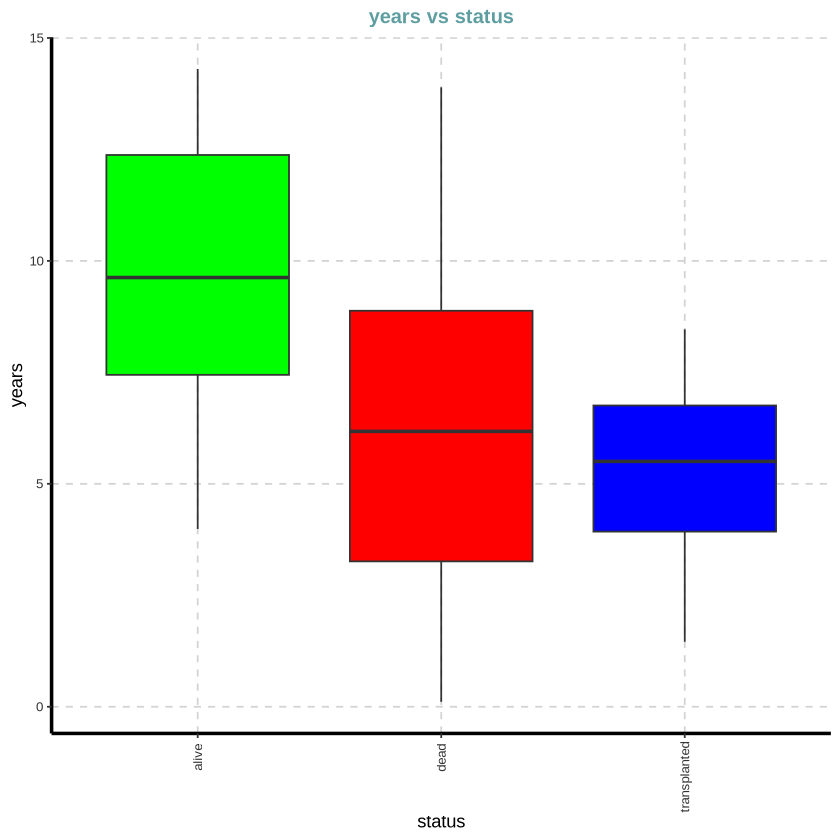

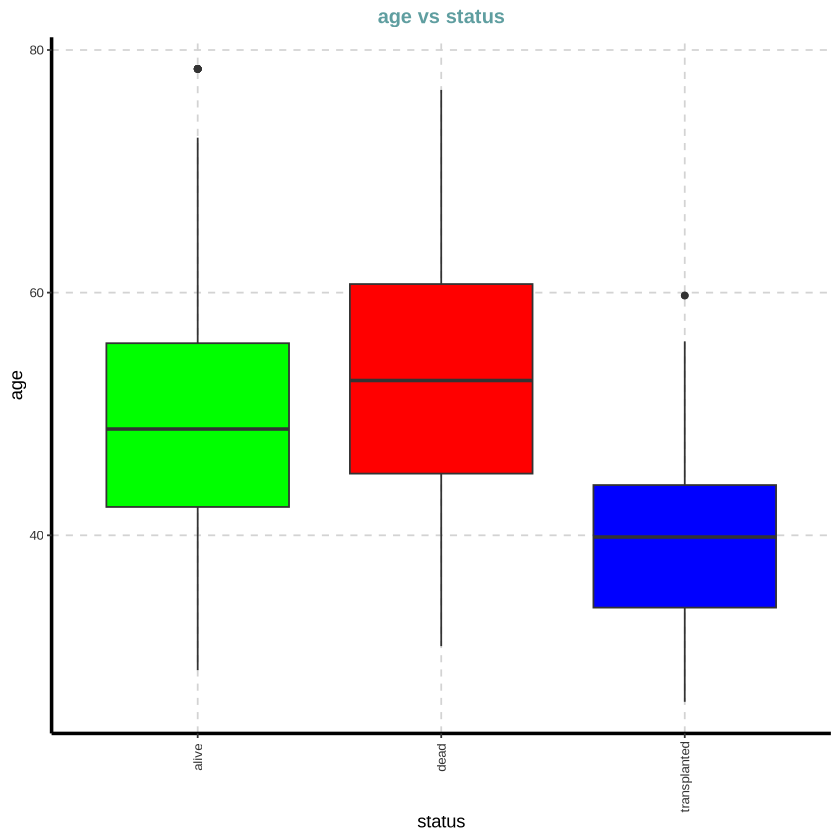

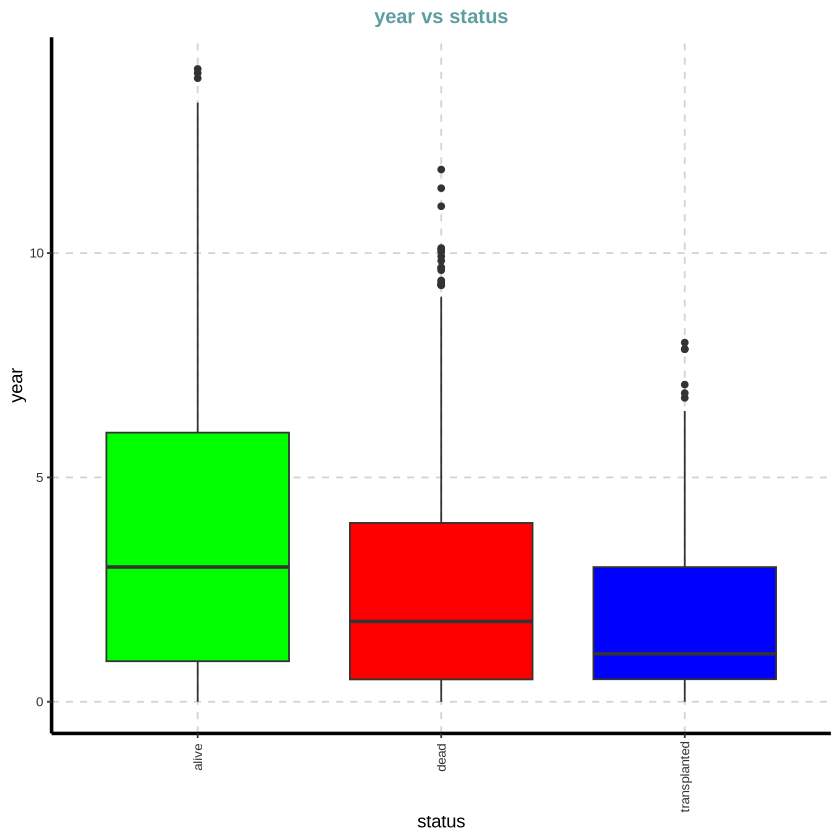

Warning message:
“Removed 821 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


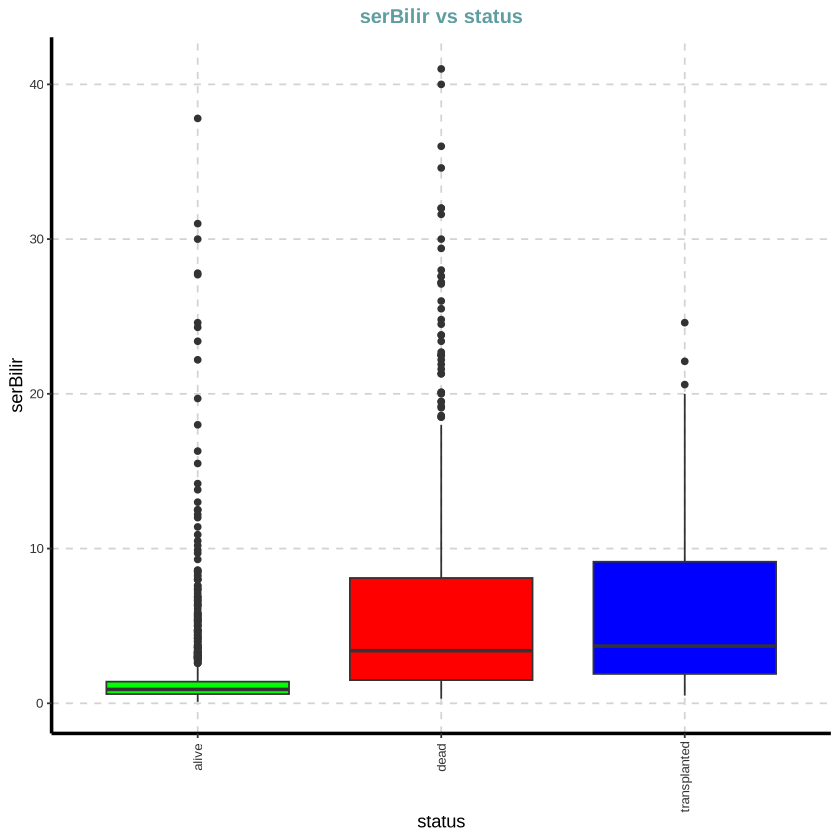

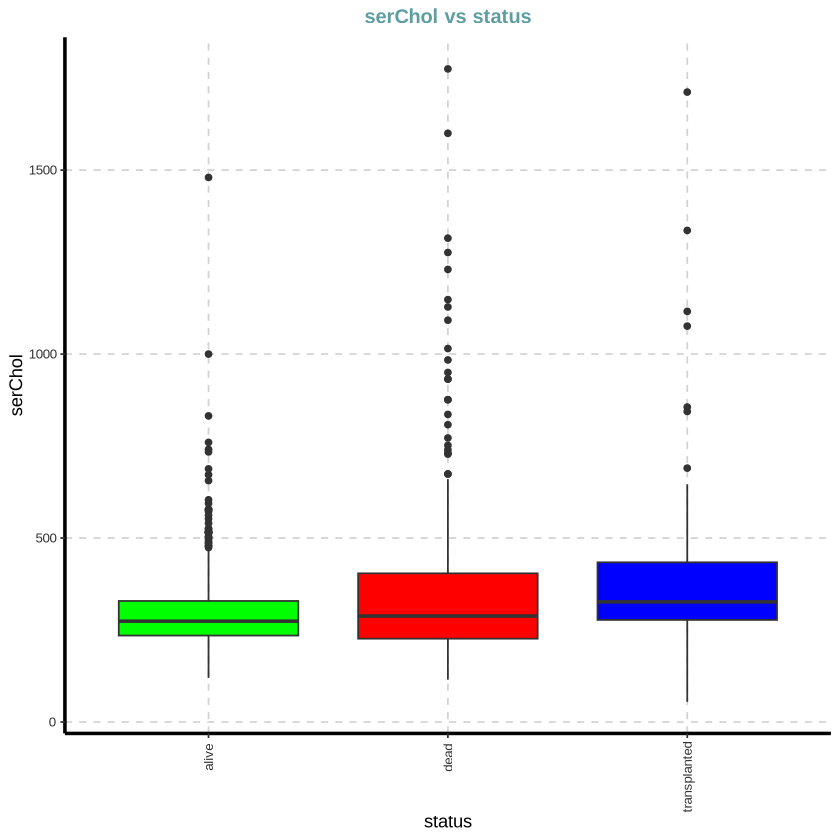

Warning message:
“Removed 60 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


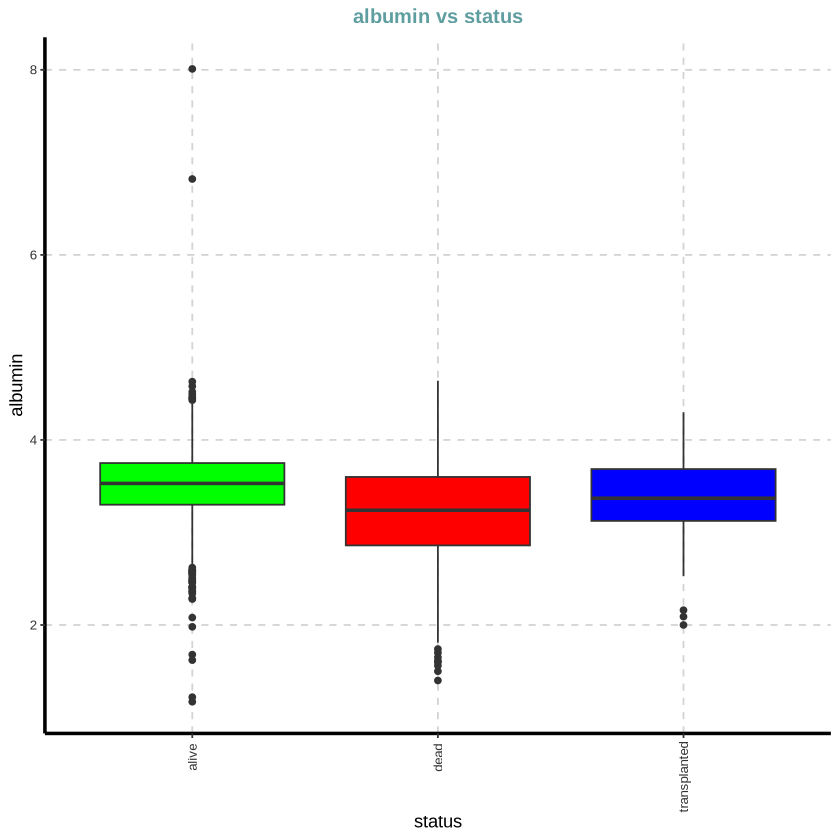

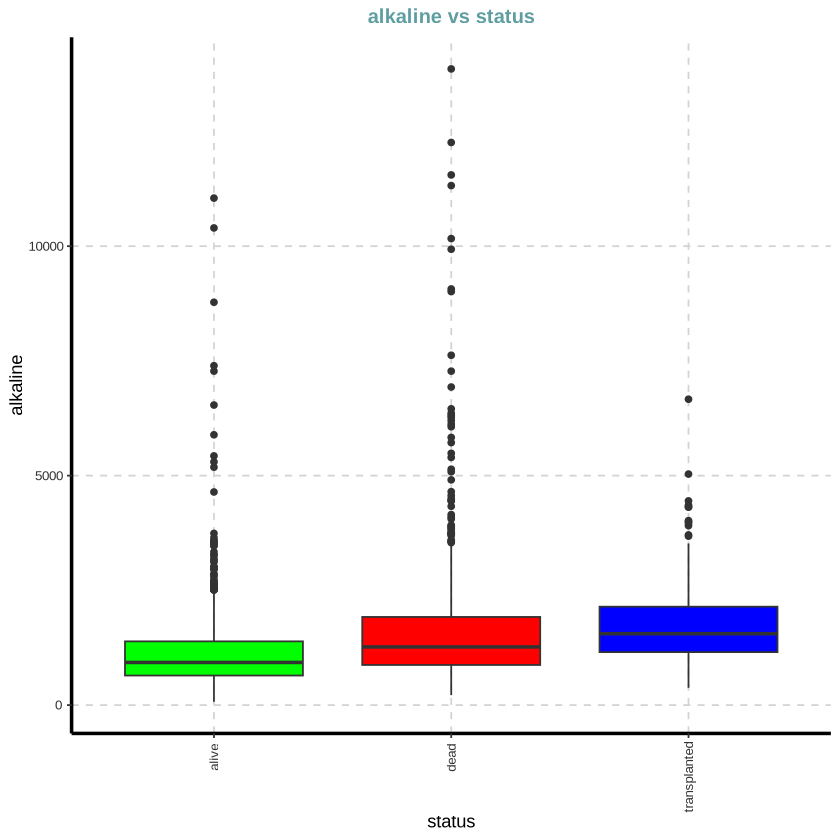

Warning message:
“Removed 73 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


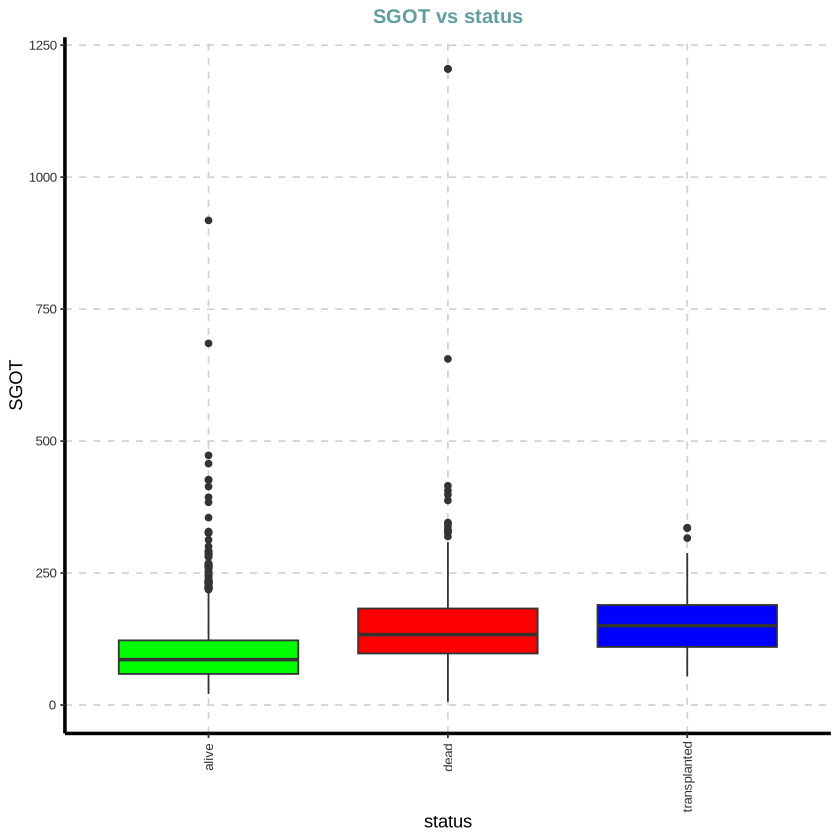

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]


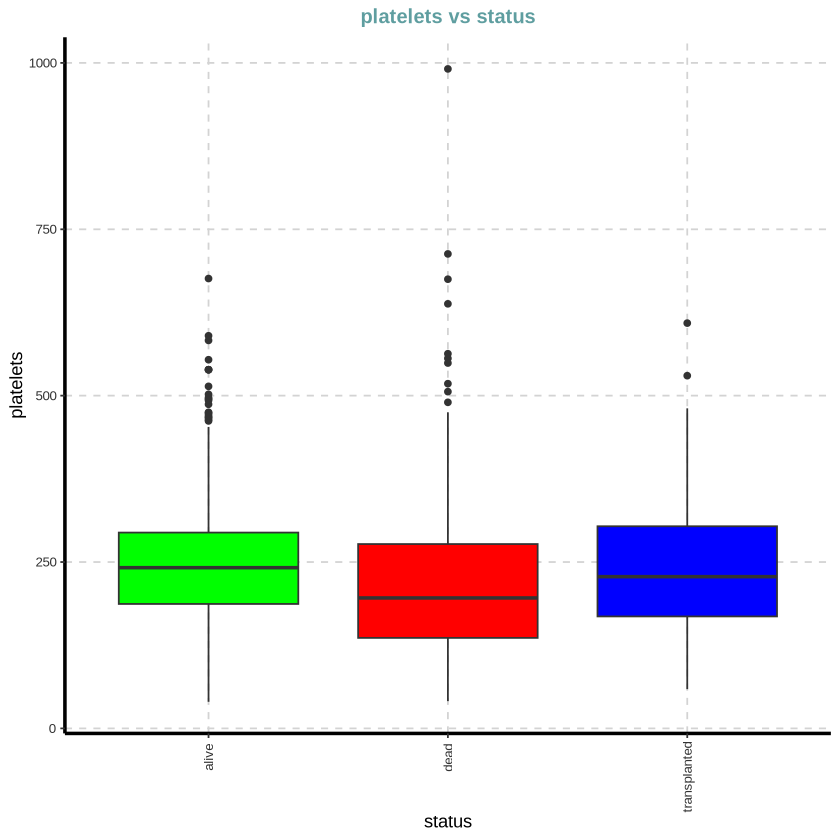

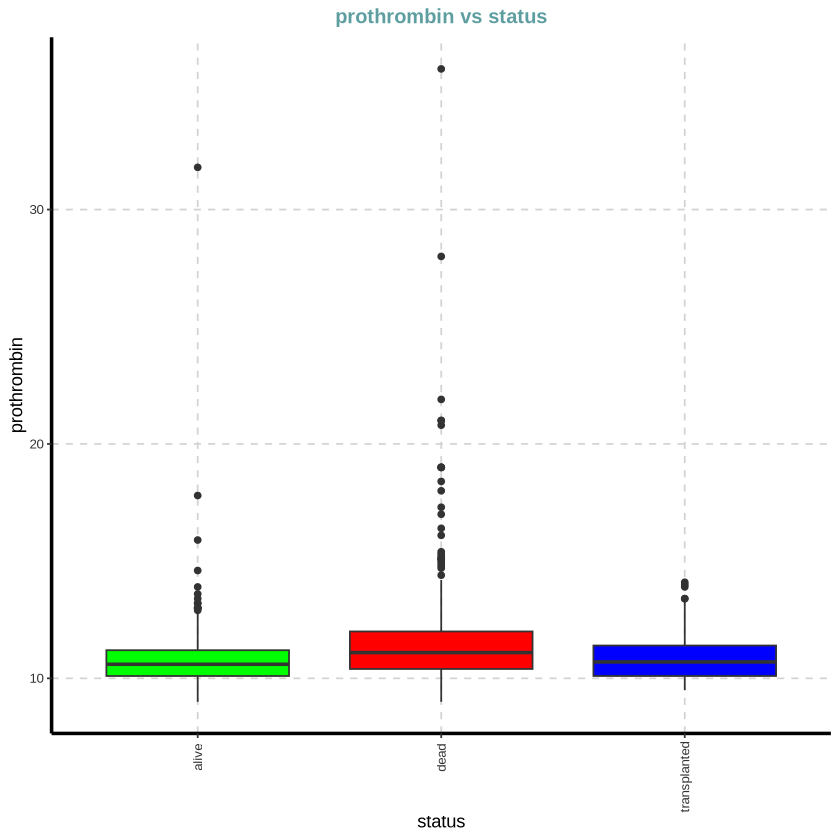

In [45]:
ExpNumViz(data=pbc2_data, type=2, target='status', col=c("green", "red", "blue"))

## Categorical values

In [54]:
help(ExpCatStat)

ExpCatStat {SmartEDA},R Documentation
data,dataframe or matrix
Target,target variable
result,"""Stat"" - summary statistics, ""IV"" - information value"
clim,maximum unique levles for categorical variable. Variables will be dropped if unique levels is higher than clim for class factor/character variable
nlim,maximum unique values for numeric variable.
bins,number of bins (default is 10)
Pclass,reference category of target variable
plot,Information value barplot (default FALSE)
top,for plotting top information values (default value is 20)
Round,round of value


In [63]:
ExpCatStat(data=pbc2_data, clim=5, nlim=2, Target='status')

Warning message in FUN(X[[i]], ...):
“NAs introduits lors de la conversion automatique”


Variable,Target,Unique,Chi-squared,p-value,df,IV Value,Cramers V,Degree of Association,Predictive Power
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
drug,status,2,6.835,0.030,NA,0,0.06,Very Weak,Not Predictive
sex,status,2,71.046,0.000,NA,0,0.19,Moderate,Not Predictive
ascites,status,3,79.137,0.000,NA,0,0.20,Moderate,Not Predictive
hepatomegaly,status,3,206.093,0.000,NA,0,0.33,Strong,Not Predictive
spiders,status,3,93.916,0.000,NA,0,0.22,Moderate,Not Predictive
edema,status,3,153.770,0.000,NA,0,0.20,Moderate,Not Predictive
years,status,10,698.199,0.000,NA,0,0.42,Strong,Not Predictive
age,status,10,367.952,0.000,NA,0,0.31,Strong,Not Predictive
year,status,9,89.392,0.000,NA,0,0.15,Weak,Not Predictive


In [56]:
help(ExpCatViz)

ExpCatViz {SmartEDA},R Documentation
data,dataframe or matrix
target,target variable. This is not a mandatory field
fname,output file name. Output will be generated in PDF format
clim,maximum categories to be considered to include in bar graphs
col,"define the colors to fill the bars, default it will take sample colours"
margin,"index, 1 for row based proportions and 2 for column based proportions"
Page,"output pattern. if Page=c(3,2), It will generate 6 plots with 3 rows and 2 columns"
Flip,default vertical bars. It will be used to flip the axis vertical to horizontal
sample,random selection of categorical variable
rdata,to plot bar graph for frequency/aggregated table


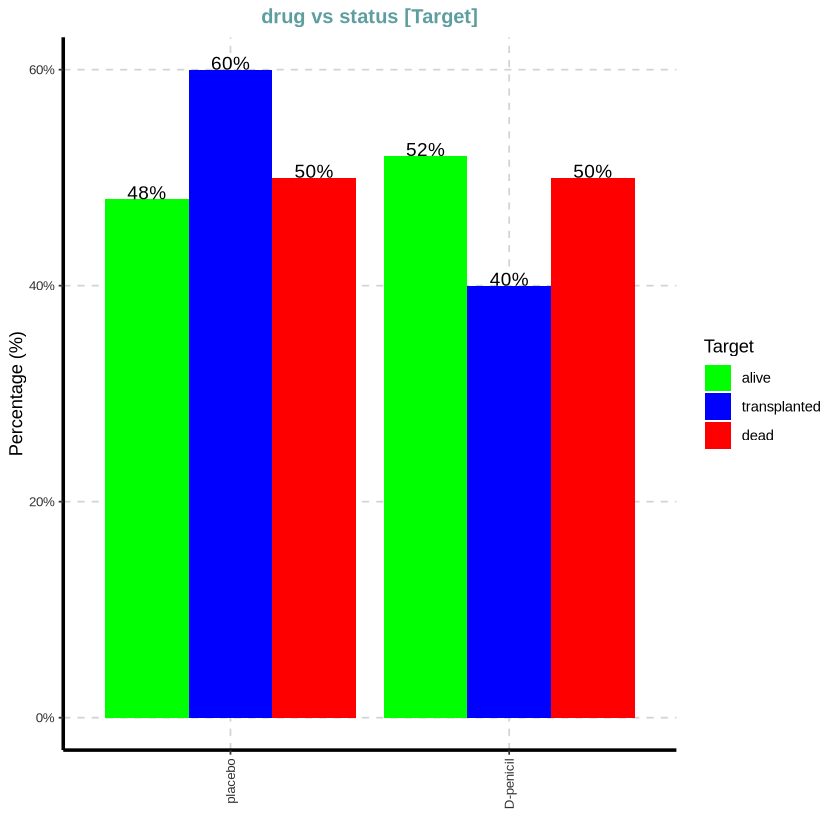

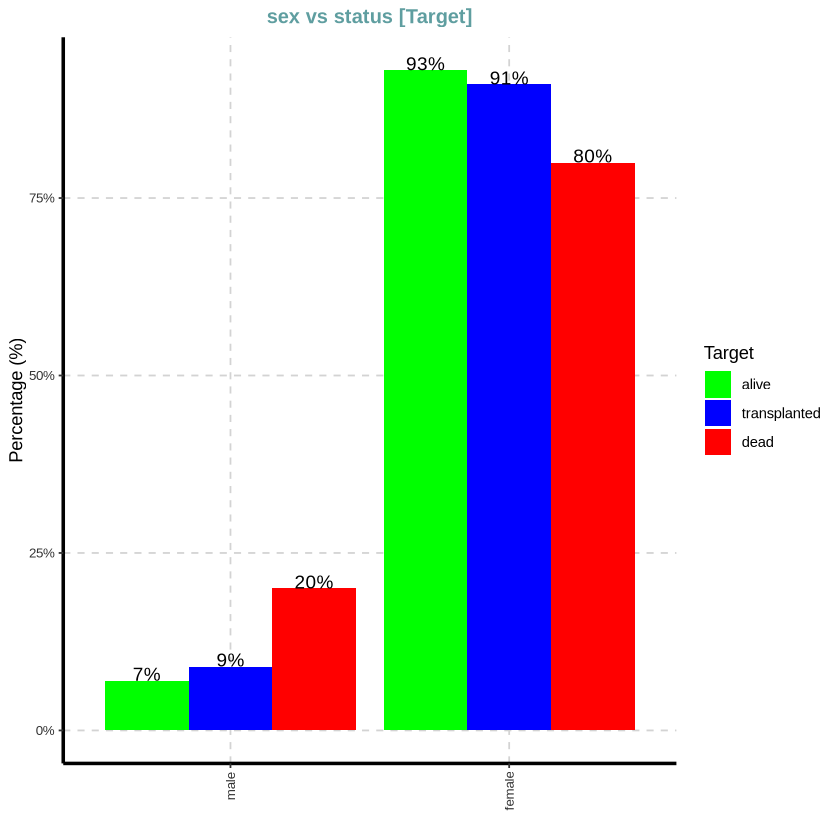

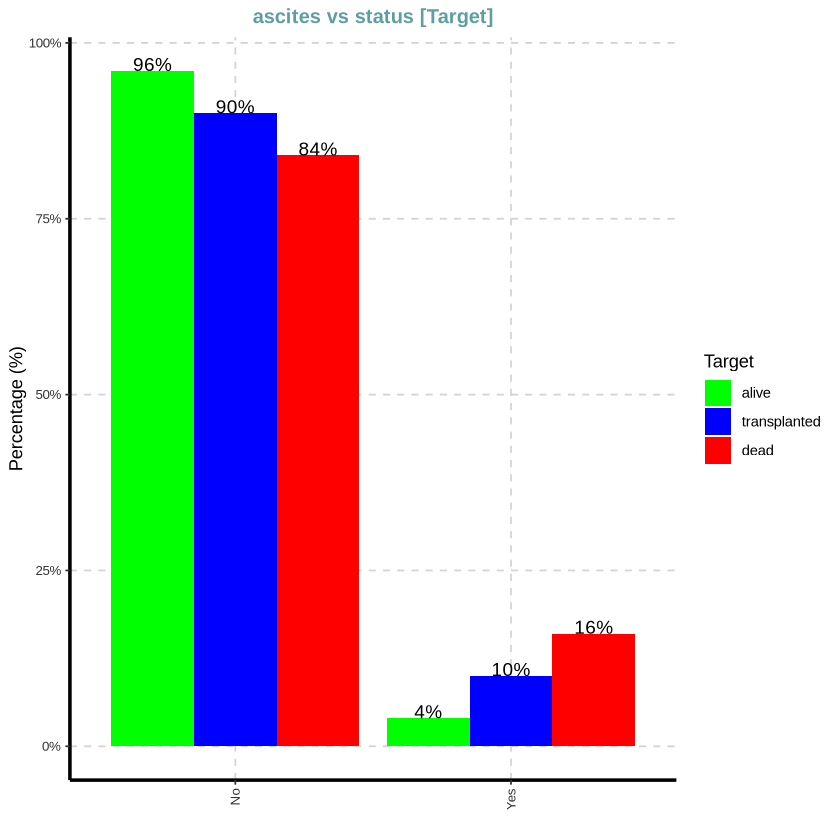

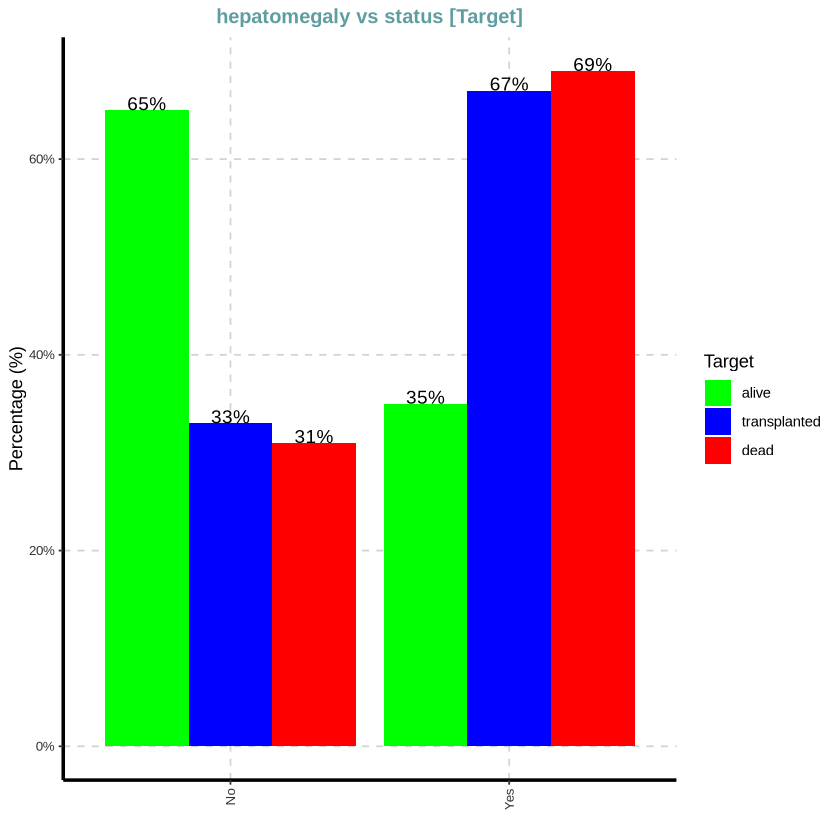

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


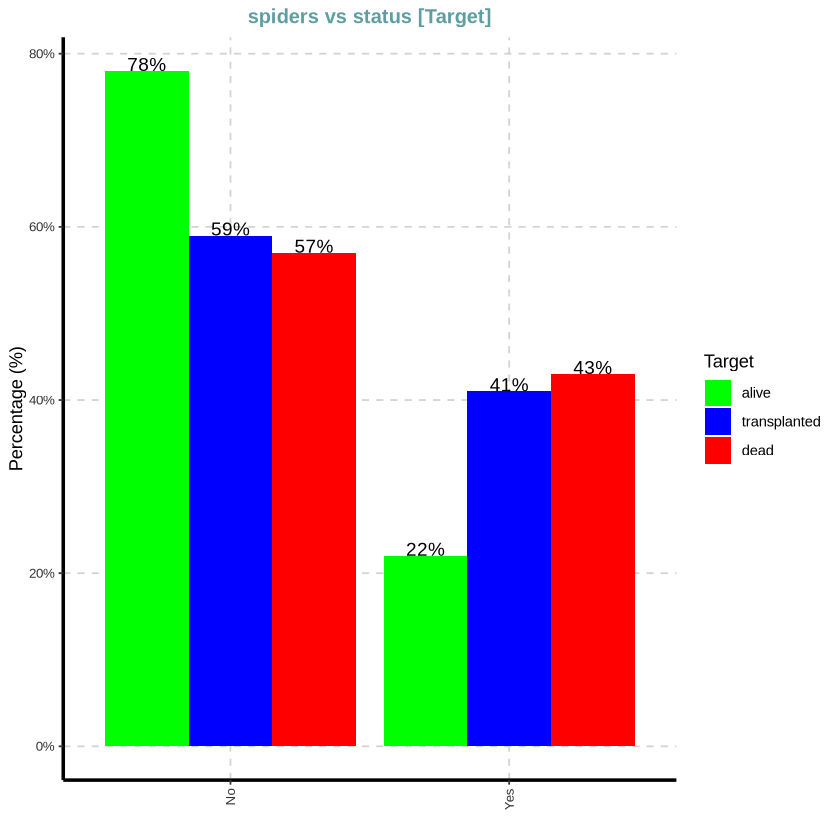

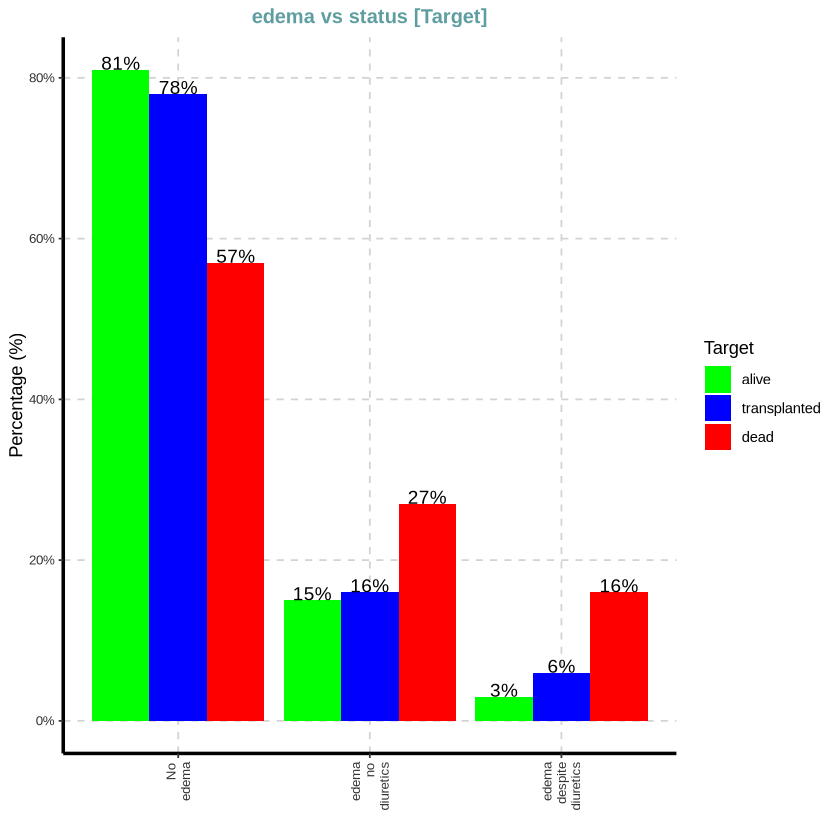

In [59]:
ExpCatViz(data = pbc2_data, target = "status", col=c('green', 'blue', 'red'))

In [65]:
write.csv2(pbc2_data, 'pbc2.csv')